In [134]:
# from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

from IPython.core.interactiveshell import InteractiveShell # allows Jupyter to display multiple output to screen
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston


InteractiveShell.ast_node_interactivity = "all" # allows Jupyter to display multiple output to screen

# load data
boston = load_boston()

# print keys, use data and target
print("keys", boston.keys())
print("features: ", boston.feature_names)
print("DESCR: ", boston.DESCR)
print("target", boston.target[0:10])

# convert into dataframe so we can see some of the data
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

# display data
df.head()
df.tail()
df.shape
#sns.pairplot(data)


keys dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
DESCR:  .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distanc

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


(506, 13)

In [135]:
# add MEDV column to our dataframe which is the target to the feature set
df['MEDV'] = boston.target
# check and make sure column in now there
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [136]:
# check for any null values in columns
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

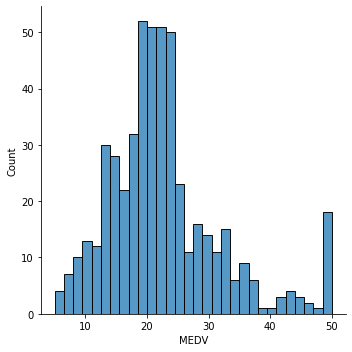

In [137]:
sns.displot(df['MEDV'], bins=30)
plt.show()

<AxesSubplot:>

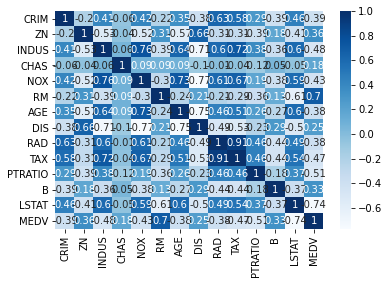

In [138]:
# get correlation matrix to measure linear relationships
c_matrix = df.corr().round(2)
# use sns to plot heatmap
sns.heatmap(data=c_matrix, annot=True, cmap='Blues')

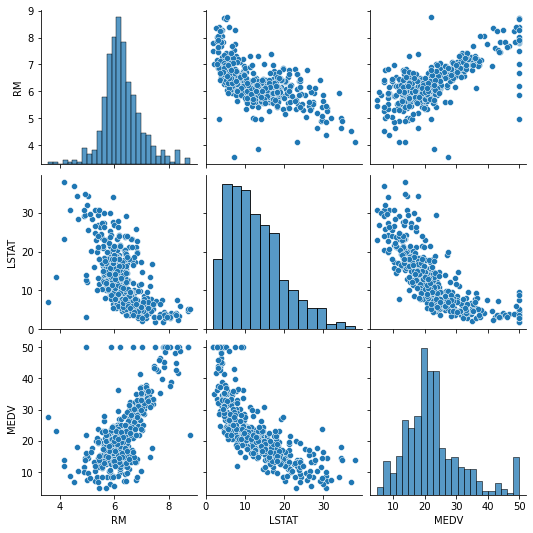

In [139]:
# MEDV and RM have a high pos correlation
# MEDV and LSTAT have a high neg correlation
# we can use pairsplot to plot and get a visual representation
sns.pairplot(df, vars=['RM', 'LSTAT', 'MEDV'])

In [140]:
# concat the two columns from our original df to create our X features
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns=['LSTAT', 'RM'])
# use the target as our y labels
y = df['MEDV']
# take a look
type(X)
type(y)
X.head()
y.head()
X.info()

pandas.core.frame.DataFrame

pandas.core.series.Series

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LSTAT   506 non-null    float64
 1   RM      506 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [141]:
from sklearn.model_selection import train_test_split

print("Total size of dataset:\t", len(X))
# use default split 75/25
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_test = X_test.sort_index()
y_test = y_test.sort_index()
print("train size (75%): \t",len(X_train))
print("test size (25%):\t", len(X_test))

Total size of dataset:	 506
train size (75%): 	 379
test size (25%):	 127


LinearRegression()

Text(17.11, 15.1, 'p1')

Text(5.713, 15.1, 'p2')

Text(0.5, 0, 'Feature Value')

Text(0, 0.5, 'Prediction')

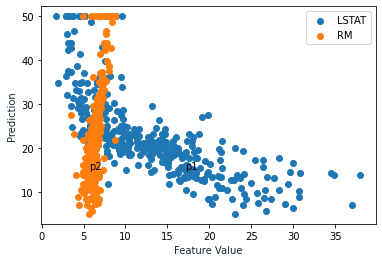

train stats: 
score:		 4.118748065377364 
square err:	 5.760504449983599 
rsquared:	 0.6045944546999358

test stats:
score:		 3.6146322360487537 
square err:	 4.8097452262904055 
rsquared:	 0.7303685000936616


In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# create model and fit to train data
model = LinearRegression()
model.fit(X_train, y_train)
# get prediction on training
pred = model.predict(X_train)

plt.scatter(X_train.iloc[:,0],y_train, label='LSTAT')
plt.scatter(X_train.iloc[:,1],y_train, label='RM')
plt.annotate("p1", (X_train.iloc[0,0], y_train.iloc[0]))
plt.annotate("p2", (X_train.iloc[0,1], y_train.iloc[0]))
plt.xlabel('Feature Value', color='#1C2833')
plt.ylabel('Prediction', color='#1C2833')
plt.legend()
plt.show()

mae = mean_absolute_error(y_train, pred)
mse = mean_squared_error(y_train, pred, squared=False)
r2 = r2_score(y_train, pred)
print("train stats: ")
print("score:\t\t", mae, "\nsquare err:\t", mse, "\nrsquared:\t", r2)

# get prediction on test
pred = model.predict(X_test)

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)
print("\ntest stats:")
print("score:\t\t", mae, "\nsquare err:\t", mse, "\nrsquared:\t", r2)



,LSTAT,RM
3,2.94,6.998
4,5.33,7.147
6,12.43,6.012
10,20.45,6.377
13,8.26,5.949


2.94

array([2.94])

6.998

[32.31954605 31.33725502 21.47842881 17.58831706 24.05886246]


(127, 1)

(127, 1)

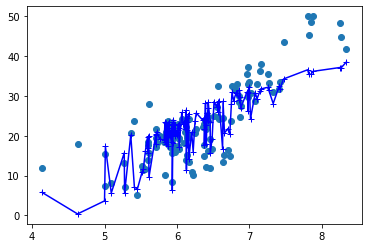

In [149]:
import operator
# # both X and X_train are dataframes
# type(X)
# type(X) == type(X_train)
# # but there lengths are different because X_train is a subset of X
# len(X)
# len(X_train)
# X_train.shape
# y_train.shape
# # grab elements from X at index 0
# X_train.iloc[0]
# # grab at 1st dimension
# X_train.iloc[0,0]
# # grab at 2nd dimension
# X_train.iloc[0,1]
# # grab y element
# y_train.iloc[0]
# plot
#****************
# X_test.shape
# y_test.shape
# pred.shape
# X_test.head()
# y_test.head()
#X_test.info()
#X_test.LSTAT
#X_test.RM

# plt.scatter(X_test.RM, y_test)
# plt.plot(X_test.RM, pred, color='r')
# plt.show()
X_test.head()
# type(X_test)
# type(pred)
# type(X_test.to_numpy())
#X_test.LSTAT.head()
X_test.iloc[0,0]
X_test.LSTAT[0:1].values
X_test.iloc[0,1]
print(pred[0:5])

#print(X_test.RM * model.coef_[0])
#pred = X_test.RM * model.coef_[0] + X_test.LSTAT * model.coef_[1] + model.intercept_

# test_pres = X_test.RM.to_numpy() * model.coef_[0] + X_test.LSTAT.to_numpy() * model.coef_[1] + model.intercept_
# print('test pred')
# pred == test_pres

xx_test = X_test.RM.to_numpy()
xx_test = xx_test[:, np.newaxis]
pred_test = pred[:, np.newaxis]

xx_test.shape
pred_test.shape

# pred = pred[:, np.newaxis]
plt.scatter(xx_test, y_test)
# xx_test, pred = zip(*sorted(zip(X_test, pred)))
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(xx_test, pred_test), key=sort_axis)
xx_test, pred_test = zip(*sorted_zip)
plt.plot(xx_test, pred_test, color='b', marker='+')
plt.show()

2.94
6.998
true		 33.4
prediction	 32.31954605299014
weights:  [-0.68527547  4.39944527]
y intercept:  3.5469379327281985
calc pred	 32.31954605299014


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

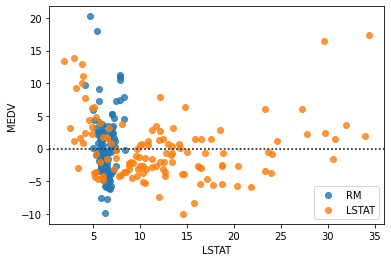

In [144]:
pred = model.predict(X_test)
print(X_test.iloc[0,0])
print(X_test.iloc[0,1])
print("true\t\t", y_test.iloc[0])
print("prediction\t",pred[0])
print("weights: ", model.coef_)
print("y intercept: ", model.intercept_)

print("calc pred\t", X_test.iloc[0,0] * model.coef_[0] + X_test.iloc[0,1] * model.coef_[1] + model.intercept_)

# residuals
residuals = y_test - pred
#print(residuals)
# plt.scatter(X_test.LSTAT, residuals)
# plt.show()

# plt.scatter(X_test.RM, residuals)
# plt.show()

sns.residplot(X_test.RM, residuals, label="RM")
sns.residplot(X_test.LSTAT, residuals, label="LSTAT")
plt.legend()
plt.show()

In [145]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on training data-set
y_train_pred = poly_model.predict(X_train_poly)

# predicting on test data-set
y_test_pred = poly_model.predict(poly_features.fit_transform(X_test))

# X_train_poly.shape
# type(X_train_poly)
# type(X_train)
# X_train.shape


mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)
print("train stats: ")
print("score:\t\t", mae, "\nsquare err:\t", mse, "\nrsquared:\t", r2)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)
print("\ntest stats:")
print("score:\t\t", mae, "\nsquare err:\t", mse, "\nrsquared:\t", r2)

LinearRegression()

train stats: 
score:		 3.2537909935010685 
square err:	 4.812468333173799 
rsquared:	 0.7240327839801758

test stats:
score:		 2.8505821931614097 
square err:	 3.596750492944047 
rsquared:	 0.8492188307863475
